# EDA
Simple EDA to visualize how is the dataset


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arushchillar/disneyland-reviews")

print("Path to dataset files:", path)

path = path + "/DisneylandReviews.csv"
path

Path to dataset files: /Users/davidpalomero/.cache/kagglehub/datasets/arushchillar/disneyland-reviews/versions/1


'/Users/davidpalomero/.cache/kagglehub/datasets/arushchillar/disneyland-reviews/versions/1/DisneylandReviews.csv'

In [ ]:
import pandas as pd

# Load file
df = pd.read_csv(path,encoding='latin-1')

df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [16]:
# General Info
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB
None
           Review_ID        Rating Year_Month Reviewer_Location  \
count   4.265600e+04  42656.000000      42656             42656   
unique           NaN           NaN        112               162   
top              NaN           NaN    missing     United States   
freq             NaN           NaN       2613             14551   
mean    3.188553e+08      4.217695        NaN               NaN   
std     1.657092e+08      1.063371        NaN              

Rating
5    23146
4    10775
3     5109
2     2127
1     1499
Name: count, dtype: int64


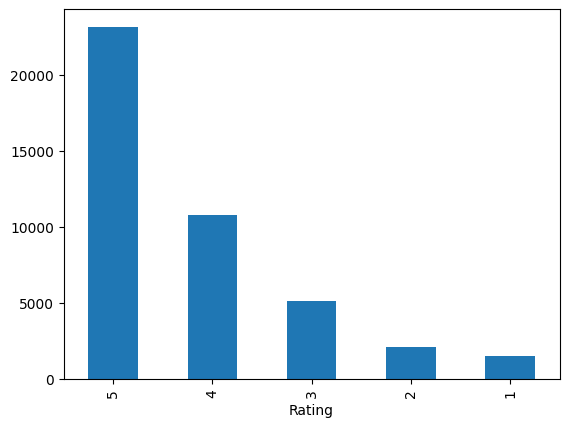

In [ ]:
# Rating Column analisys

print(df['Rating'].value_counts())

import matplotlib as plt

df['Rating'].value_counts().plot(kind='bar')


<Axes: xlabel='Year'>

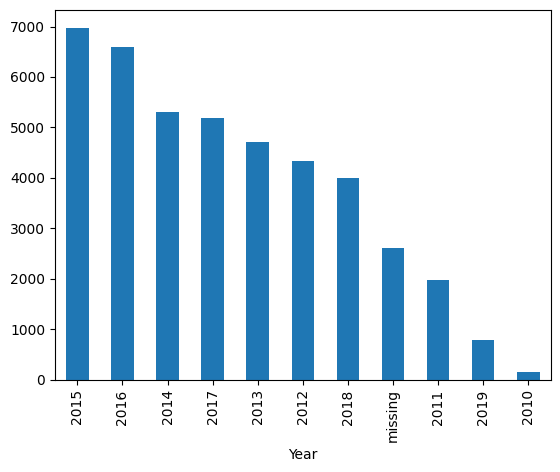

In [28]:
# Year_month
df['Year_Month'].value_counts()
df['Year'] = df['Year_Month'].str.split('-').str[0]
df['Month'] = df['Year_Month'].str.split('-').str[1]
df['Year'].value_counts().plot(kind='bar')


Reviewer_Location
Namibia          1
Armenia          1
Timor-Leste      1
South Sudan      1
Åland Islands    1
Name: count, dtype: int64

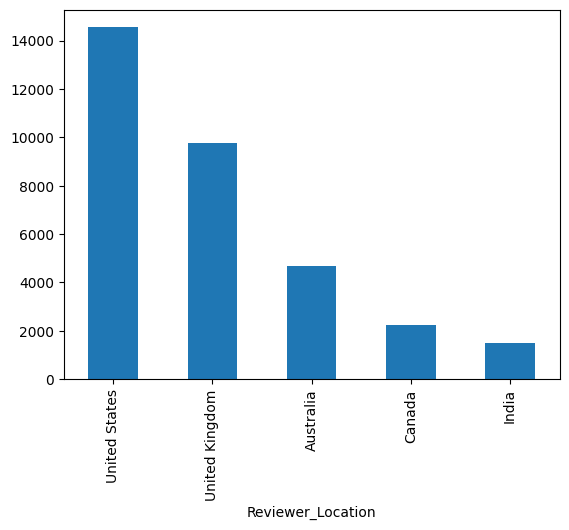

In [36]:
# Reviewer location
df['Reviewer_Location'].value_counts().head(5).plot(kind='bar')
df['Reviewer_Location'].value_counts().tail(5)



Branch
Disneyland_California    19406
Disneyland_Paris         13630
Disneyland_HongKong       9620
Name: count, dtype: int64


<Axes: xlabel='Branch'>

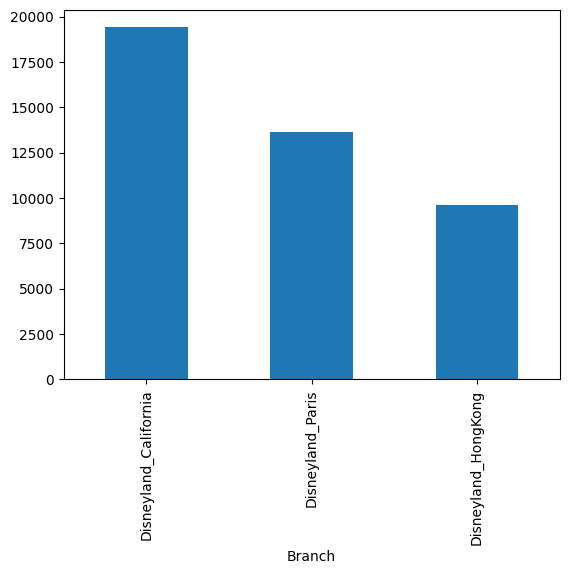

In [39]:
# Branch
print(df['Branch'].value_counts())
df['Branch'].value_counts().plot(kind='bar')

In [54]:
# Review_Text
import re
from wordcloud import WordCloud, STOPWORDS
def clean_text(texto):
    """Función para limpiar y preprocesar el texto"""
    if pd.isna(texto):
        return ""
    
    texto = str(texto).lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = re.sub(r'\d+', '', texto)  
    texto = re.sub(r'\s+', ' ', texto)    
    return texto.strip()


cleared_text = df['Review_Text'].dropna().apply(clean_text)

text = ' '.join(cleared_text.tolist())


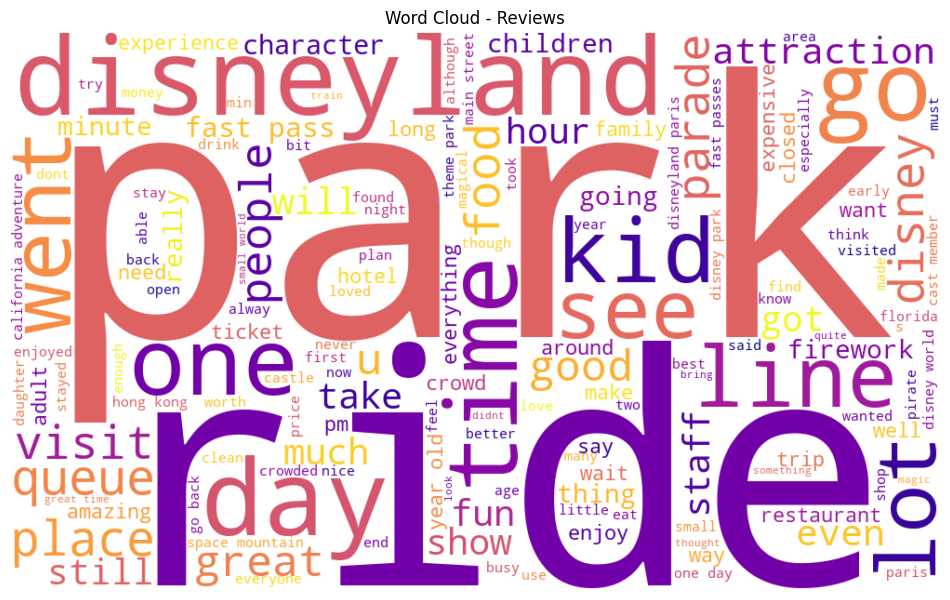

In [57]:
# Create Worldcloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    stopwords=STOPWORDS,
    max_words=150,
    colormap='plasma',
    contour_width=2,
    contour_color='navy',
    random_state=42
).generate(text)
import matplotlib.pyplot as plt

# Visualize
plt.figure(figsize=(12, 8))  # No usar 'fig' si ya está usado
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Reviews')
plt.show()